In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
path = '20250107_N2_NH3/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(9348, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
0,-37.0,-23.0,6.0,8.0,8.0,31.0,6.0,4.0,-6.0,-14.0,...,-26.0,-7.0,-23.0,-18.0,-3.0,54.0,9.0,-36.0,-23.0,-15.0
1,-22.0,-31.0,15.0,11.0,32.0,30.0,-4.0,10.0,-1.0,-20.0,...,-13.0,-9.0,-17.0,9.0,8.0,58.0,5.0,-17.0,-14.0,10.0
2,-37.0,-26.0,13.0,1.0,3.0,28.0,5.0,5.0,0.0,-12.0,...,-13.0,-4.0,-8.0,-7.0,-12.0,53.0,-6.0,-32.0,-19.0,-3.0
3,-49.0,-26.0,9.0,14.0,14.0,33.0,-3.0,-2.0,-6.0,-30.0,...,-22.0,14.0,-2.0,4.0,10.0,48.0,-10.0,-18.0,-27.0,-11.0
4,-46.0,-14.0,9.0,4.0,19.0,40.0,0.0,-2.0,23.0,-19.0,...,-25.0,2.0,-28.0,9.0,6.0,48.0,3.0,-20.0,-23.0,-15.0


In [122]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.6*i for i in range(len(df.index))]
df.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,-37.0,-23.0,6.0,8.0,8.0,31.0,6.0,4.0,-6.0,-14.0,...,-26.0,-7.0,-23.0,-18.0,-3.0,54.0,9.0,-36.0,-23.0,-15.0
0.6,-22.0,-31.0,15.0,11.0,32.0,30.0,-4.0,10.0,-1.0,-20.0,...,-13.0,-9.0,-17.0,9.0,8.0,58.0,5.0,-17.0,-14.0,10.0
1.2,-37.0,-26.0,13.0,1.0,3.0,28.0,5.0,5.0,0.0,-12.0,...,-13.0,-4.0,-8.0,-7.0,-12.0,53.0,-6.0,-32.0,-19.0,-3.0
1.8,-49.0,-26.0,9.0,14.0,14.0,33.0,-3.0,-2.0,-6.0,-30.0,...,-22.0,14.0,-2.0,4.0,10.0,48.0,-10.0,-18.0,-27.0,-11.0
2.4,-46.0,-14.0,9.0,4.0,19.0,40.0,0.0,-2.0,23.0,-19.0,...,-25.0,2.0,-28.0,9.0,6.0,48.0,3.0,-20.0,-23.0,-15.0


In [123]:
# extact 20, 40 and 60 cycles
c20 = df[(df.index >= 1690) & (df.index <=1780)]
c40 = df[(df.index >= 3410) & (df.index <=3500)]
c60 = df[(df.index >= 5130) & (df.index <=5220)]
c20.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1690.2,-50.0,-25.0,11.0,11.0,12.0,45.0,-13.0,5.0,5.0,-39.0,...,-14.0,-5.0,-9.0,-4.0,2.0,58.0,-4.0,-25.0,-23.0,-3.0
1690.8,-39.0,-27.0,19.0,3.0,7.0,35.0,-9.0,-4.0,-9.0,-19.0,...,-17.0,-15.0,-21.0,5.0,4.0,45.0,3.0,-39.0,-29.0,-22.0
1691.4,-24.0,-22.0,6.0,-10.0,3.0,39.0,4.0,-3.0,-2.0,-23.0,...,-20.0,-2.0,-18.0,3.0,-19.0,44.0,-20.0,-18.0,-22.0,-1.0
1692.0,-44.0,-26.0,6.0,-9.0,12.0,32.0,-2.0,-15.0,-2.0,-17.0,...,-6.0,-7.0,-24.0,-3.0,1.0,38.0,-17.0,-16.0,-27.0,-12.0
1692.6,-36.0,-29.0,6.0,0.0,16.0,53.0,-12.0,-3.0,-6.0,-31.0,...,-19.0,-3.0,0.0,2.0,1.0,33.0,-17.0,-23.0,-23.0,0.0


In [124]:
c40.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
3410.4,-31.0,-22.0,3.0,-2.0,22.0,37.0,3.0,-1.0,-14.0,-7.0,...,-21.0,5.0,-17.0,16.0,-7.0,41.0,-10.0,-19.0,-21.0,1.0
3411.0,-27.0,-20.0,16.0,2.0,20.0,17.0,-1.0,2.0,6.0,-17.0,...,-19.0,6.0,-10.0,-7.0,10.0,50.0,-4.0,-29.0,-24.0,-2.0
3411.6,-51.0,-19.0,27.0,-2.0,28.0,33.0,4.0,8.0,7.0,-18.0,...,-13.0,1.0,-19.0,-15.0,11.0,44.0,2.0,-24.0,-23.0,0.0
3412.2,-35.0,-28.0,2.0,-6.0,22.0,36.0,-18.0,2.0,-14.0,-5.0,...,-24.0,-6.0,-18.0,3.0,-6.0,43.0,-26.0,-29.0,-25.0,-28.0
3412.8,-29.0,-16.0,12.0,-5.0,26.0,38.0,-3.0,3.0,1.0,-39.0,...,-24.0,-7.0,-11.0,-5.0,-3.0,44.0,-12.0,-32.0,-35.0,-6.0


In [125]:
c60.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
5130.0,-37.0,-24.0,6.0,14.0,17.0,43.0,3.0,-14.0,-2.0,-20.0,...,-4.0,6.0,-9.0,2.0,-6.0,62.0,-4.0,-21.0,-14.0,-11.0
5130.6,-42.0,-20.0,8.0,4.0,-1.0,50.0,-4.0,-2.0,-14.0,-25.0,...,-31.0,7.0,-10.0,-7.0,-7.0,41.0,-2.0,-29.0,-26.0,-8.0
5131.2,-47.0,-32.0,13.0,8.0,20.0,53.0,-3.0,-2.0,6.0,-26.0,...,-14.0,3.0,-1.0,-12.0,-13.0,57.0,-15.0,-9.0,-34.0,-1.0
5131.8,-39.0,-14.0,1.0,4.0,-1.0,24.0,-5.0,-8.0,-3.0,-25.0,...,-5.0,1.0,-17.0,-5.0,-7.0,42.0,-3.0,-28.0,-27.0,-8.0
5132.4,-35.0,-24.0,7.0,9.0,16.0,38.0,2.0,1.0,3.0,-22.0,...,-31.0,-2.0,-20.0,-5.0,-10.0,43.0,-5.0,-33.0,-41.0,-17.0


In [126]:
c20_log = c20.copy()
c40_log = c40.copy()
c60_log = c60.copy()

x_20 = [0.6*i for i in range(len(c20.index))]
y_20 = c20.columns.tolist()
x_40 = [0.6*i for i in range(len(c40.index))]
y_40 = c40.columns.tolist()
x_60 = [0.6*i for i in range(len(c60.index))]
y_60 = c60.columns.tolist()

# absolute
for i in range(len(c20.index)):
    for j in range(len(c20.columns)):
        if c20.iloc[i,j]<0:
            c20.iloc[i,j]=0
# log
for i in range(len(c20_log.index)):
    for j in range(len(c20.columns)):
        if c20_log.iloc[i,j]<=1:
            c20_log.iloc[i,j]=0
        else:
            c20_log.iloc[i,j] = np.log10(c20_log.iloc[i,j])

# absolute
for i in range(len(c40.index)):
    for j in range(len(c40.columns)):
        if c40.iloc[i,j]<0:
            c40.iloc[i,j]=0
# log
for i in range(len(c40_log.index)):
    for j in range(len(c40.columns)):
        if c40_log.iloc[i,j]<=1:
            c40_log.iloc[i,j]=0
        else:
            c40_log.iloc[i,j] = np.log10(c40_log.iloc[i,j])

# absolute
for i in range(len(c60.index)):
    for j in range(len(c60.columns)):
        if c60.iloc[i,j]<0:
            c60.iloc[i,j]=0
# log
for i in range(len(c60_log.index)):
    for j in range(len(c60.columns)):
        if c60_log.iloc[i,j]<=1:
            c60_log.iloc[i,j]=0
        else:
            c60_log.iloc[i,j] = np.log10(c60_log.iloc[i,j])

C:\Users\syj43\AppData\Local\Temp\ipykernel_3516\4279822779.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c20.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_3516\4279822779.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c40.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_3516\4279822779.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c60.iloc[i,j]=0


In [127]:
# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(c20_log.columns).reshape(-1, 1))
y_20 = mm.transform(np.array(c20_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c40_log.columns).reshape(-1, 1))
y_40 = mm.transform(np.array(c40_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c60_log.columns).reshape(-1, 1))
y_60 = mm.transform(np.array(c60_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

In [128]:
X_20, Y_20 = np.meshgrid(x_20, y_20)
Z_20 = c20_log.T

X_40, Y_40 = np.meshgrid(x_40, y_40)
Z_40 = c40_log.T

X_60, Y_60 = np.meshgrid(x_60, y_60)
Z_60 = c60_log.T

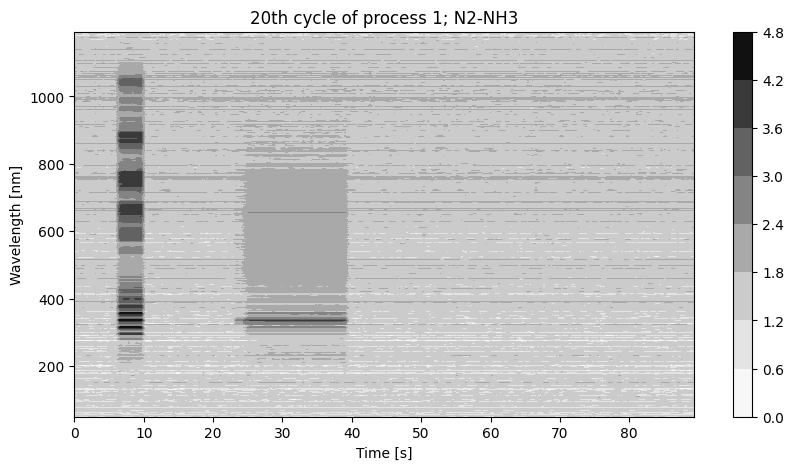

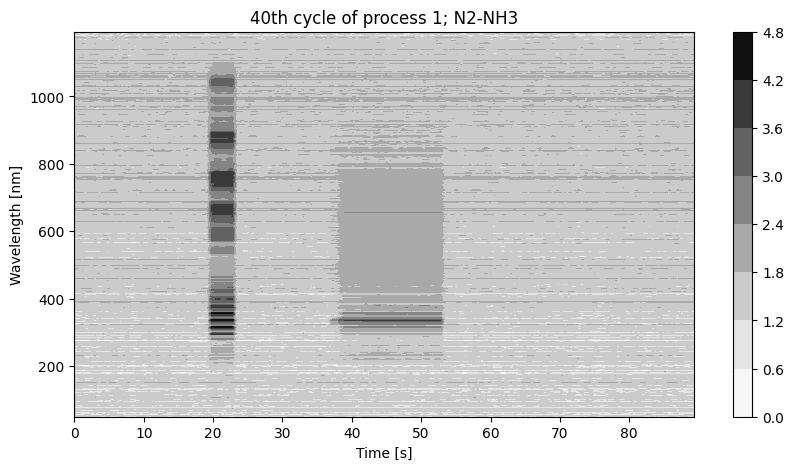

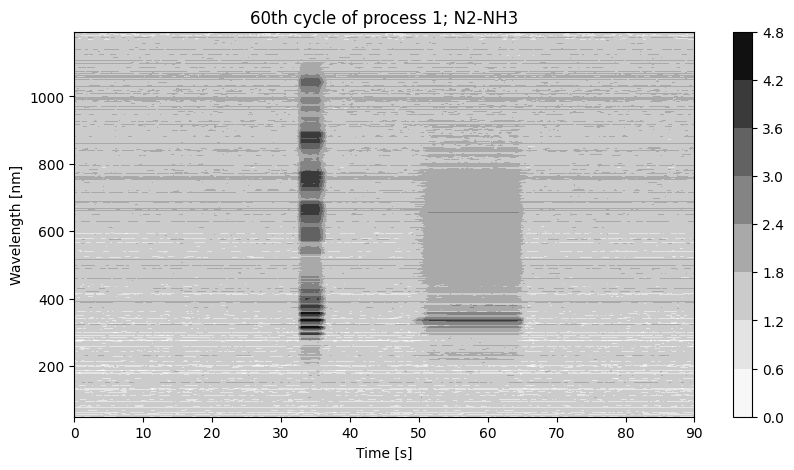

In [129]:
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

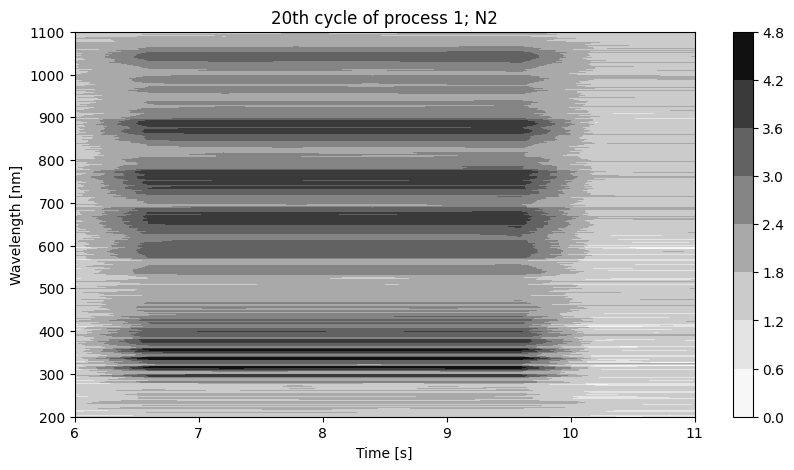

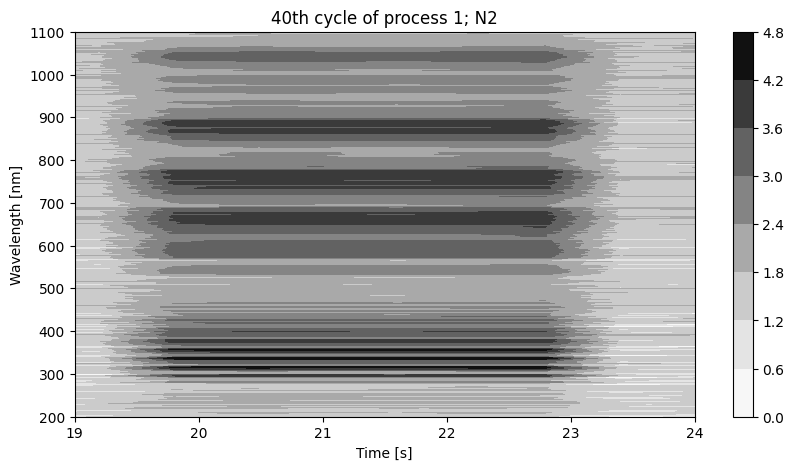

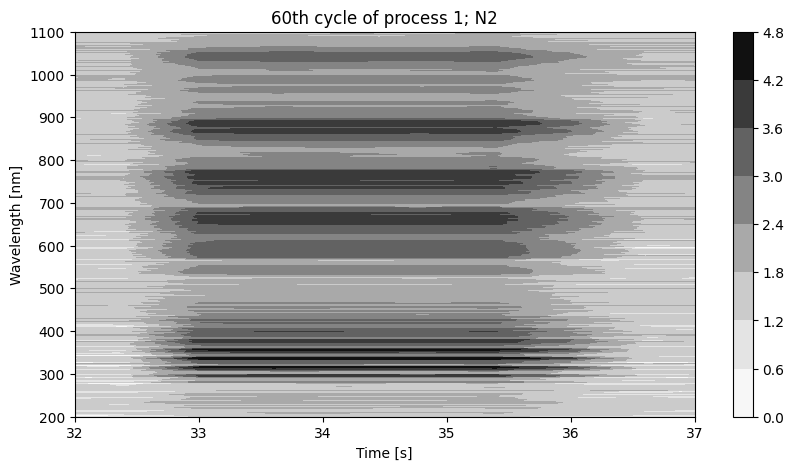

In [130]:
#N2
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(6,11) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(19,24) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(32,37) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2')
plt.colorbar()
plt.show()

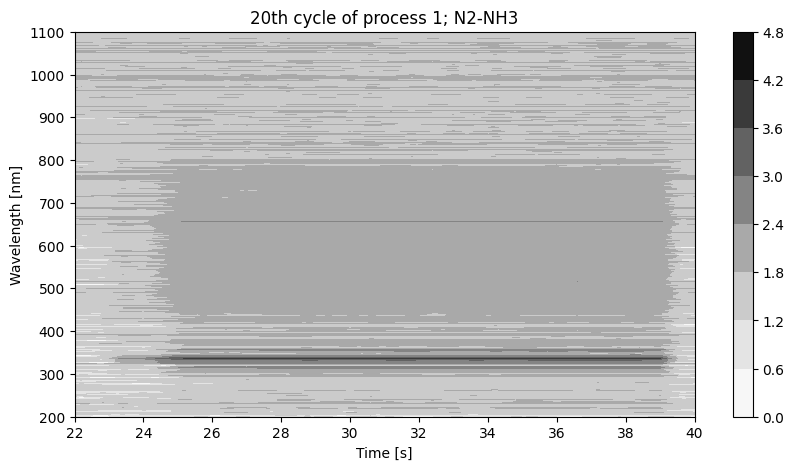

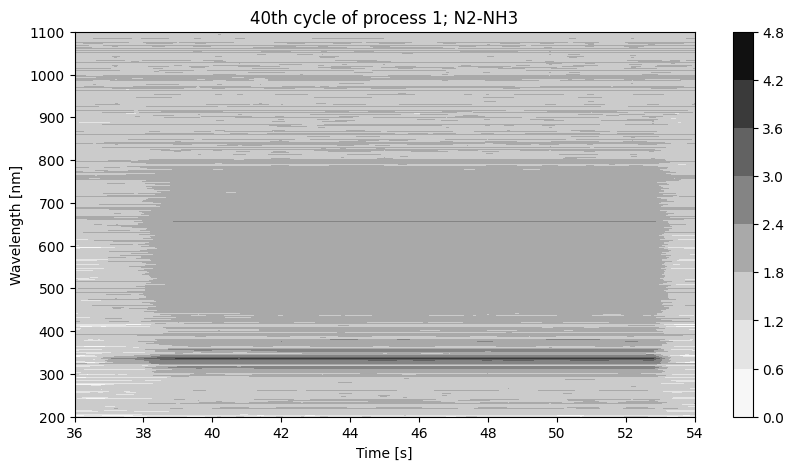

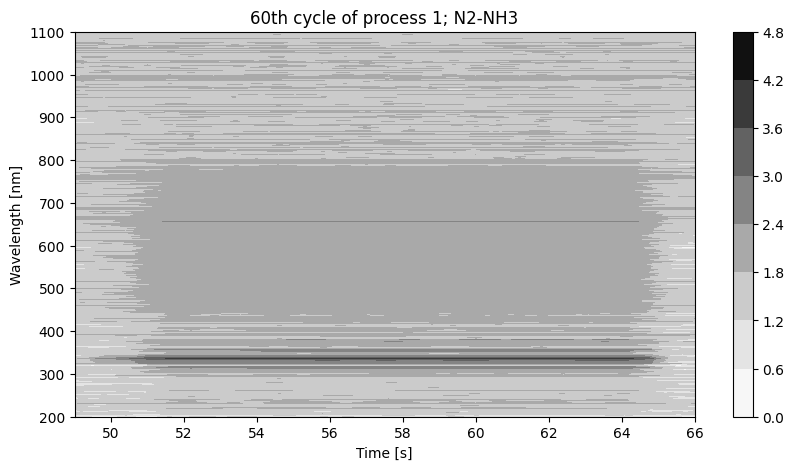

In [131]:
#NH3
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(22,40) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(36,54) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(49,66) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

In [132]:
c20_start = 1690.2
c20_N2 = c20[(c20.index>=c20_start+6)&(c20.index<=c20_start+11)]
c20_NH3 = c20[(c20.index>=c20_start+22)&(c20.index<=c20_start+40)]

c40_start = 3410.4
c40_N2 = c40[(c40.index>=c40_start+19)&(c40.index<=c40_start+24)]
c40_NH3 = c40[(c40.index>=c40_start+36)&(c40.index<=c40_start+54)]

c60_start = 5130.0
c60_N2 = c60[(c60.index>=c60_start+32)&(c60.index<=c60_start+37)]
c60_NH3 = c60[(c60.index>=c60_start+49)&(c60.index<=c60_start+66)]

In [133]:
c20_N2

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1696.2,0.0,0.0,26.0,13.0,18.0,14.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,3.0,13.0,37.0,0.0,0.0,0.0,8.0
1696.8,0.0,0.0,5.0,9.0,19.0,40.0,0.0,0.0,8.0,0.0,...,0.0,7.0,0.0,14.0,12.0,33.0,0.0,0.0,0.0,0.0
1697.4,0.0,0.0,6.0,3.0,0.0,31.0,11.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,38.0,0.0,0.0,0.0,0.0
1698.0,0.0,0.0,0.0,13.0,6.0,36.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,21.0,14.0,58.0,0.0,0.0,0.0,0.0
1698.6,0.0,0.0,9.0,0.0,9.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,50.0,2.0,0.0,0.0,2.0
1699.2,0.0,0.0,13.0,8.0,31.0,24.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0
1699.8,0.0,0.0,16.0,0.0,8.0,23.0,2.0,0.0,1.0,0.0,...,0.0,3.0,0.0,12.0,0.0,48.0,2.0,0.0,0.0,0.0
1700.4,0.0,0.0,18.0,0.0,12.0,45.0,0.0,5.0,7.0,0.0,...,0.0,1.0,0.0,0.0,13.0,33.0,0.0,0.0,0.0,0.0
1701.0,0.0,0.0,10.0,1.0,12.0,39.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0


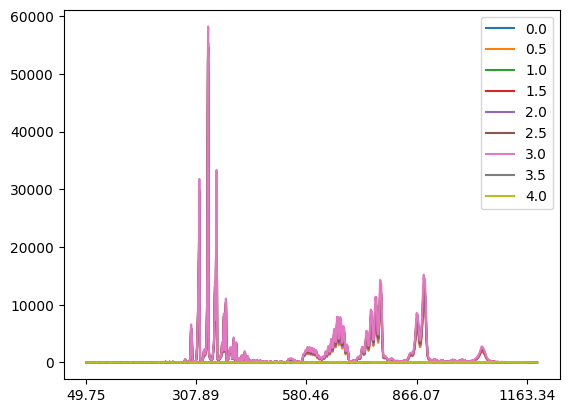

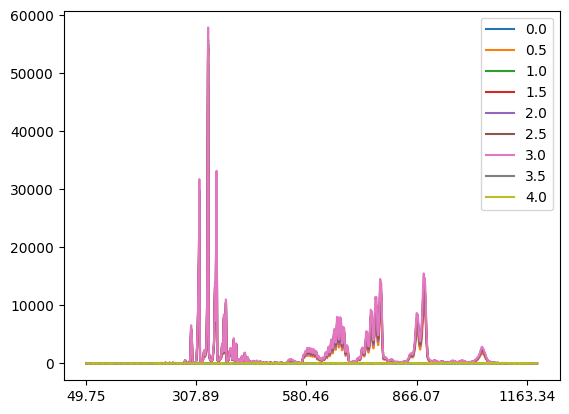

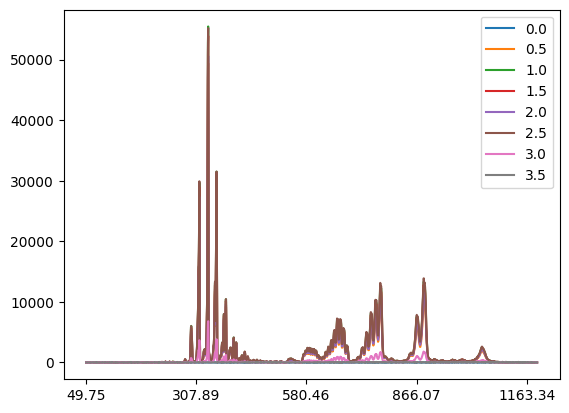

In [135]:
c20_N2.index = [np.round(0.5*i,2) for i in range(len(c20_N2))]
c20_N2.T.plot(kind='line')
plt.show()

c40_N2.index = [np.round(0.5*i,2) for i in range(len(c40_N2))]
c40_N2.T.plot(kind='line')
plt.show()

c60_N2.index = [np.round(0.5*i,2) for i in range(len(c60_N2))]
c60_N2.T.plot(kind='line')
plt.show()

In [136]:
c20_N2

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,0.0,0.0,26.0,13.0,18.0,14.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,3.0,13.0,37.0,0.0,0.0,0.0,8.0
0.5,0.0,0.0,5.0,9.0,19.0,40.0,0.0,0.0,8.0,0.0,...,0.0,7.0,0.0,14.0,12.0,33.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,6.0,3.0,0.0,31.0,11.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,38.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,13.0,6.0,36.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,21.0,14.0,58.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,9.0,0.0,9.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,50.0,2.0,0.0,0.0,2.0
2.5,0.0,0.0,13.0,8.0,31.0,24.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,16.0,0.0,8.0,23.0,2.0,0.0,1.0,0.0,...,0.0,3.0,0.0,12.0,0.0,48.0,2.0,0.0,0.0,0.0
3.5,0.0,0.0,18.0,0.0,12.0,45.0,0.0,5.0,7.0,0.0,...,0.0,1.0,0.0,0.0,13.0,33.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,10.0,1.0,12.0,39.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0


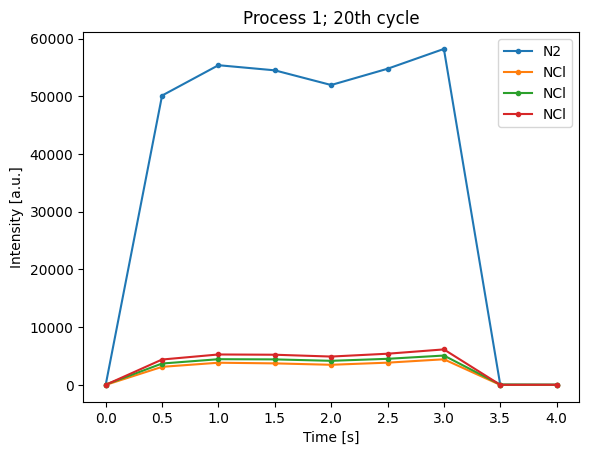

In [177]:
plt.plot(c20_N2['336.67'],'.-', label='N2')

# N-Cl
# 702.8 nm
# plt.plot(c20_N2['702.32'],'.-', label='702.8')
# plt.plot(c20_N2['702.89'],'.-', label='702.8')
# plt.plot(c20_N2['703.46'],'.-', label='702.8')
# 664.7 nm
plt.plot(c20_N2['664.27'],'.-', label='NCl')
plt.plot(c20_N2['664.84'],'.-', label='NCl')
plt.plot(c20_N2['665.4'],'.-', label='NCl')
# 626.2 nm
# plt.plot(c20_N2['625.88'],'.-', label='626.2')
# plt.plot(c20_N2['626.44'],'.-', label='626.2')
# plt.plot(c20_N2['627.01'],'.-', label='626.2')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('Process 1; 20th cycle')
plt.legend()
plt.show()

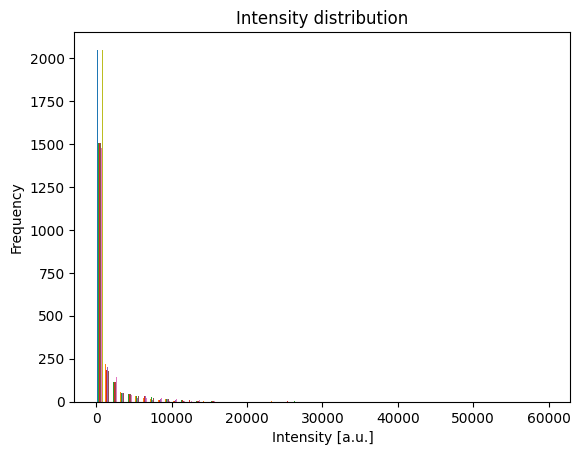

In [138]:
plt.hist(c20_N2.values.tolist(), bins=np.arange(0,61000,1000))
# plt.xlim(0,10000)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

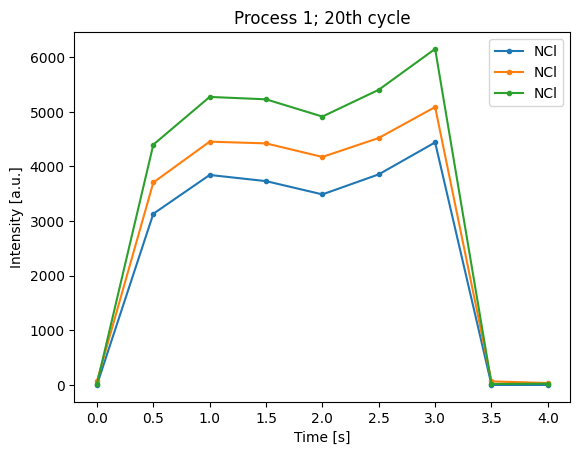

In [179]:
plt.plot(c20_N2['664.27'],'.-', label='NCl')
plt.plot(c20_N2['664.84'],'.-', label='NCl')
plt.plot(c20_N2['665.4'],'.-', label='NCl')
plt.title('Process 1; 20th cycle')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.show()

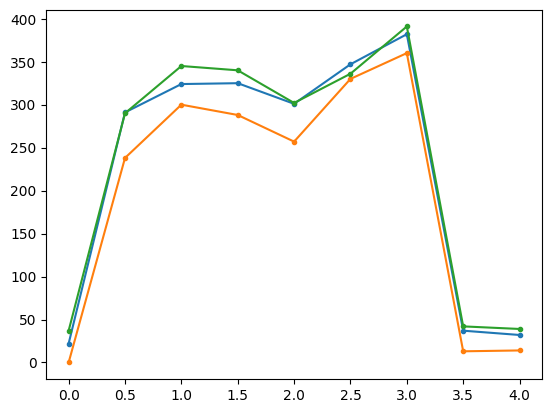

In [295]:
plt.plot(c20_N2['702.32'],'.-', label='702.8')
plt.plot(c20_N2['702.89'],'.-', label='702.8')
plt.plot(c20_N2['703.46'],'.-', label='702.8')
plt.show()

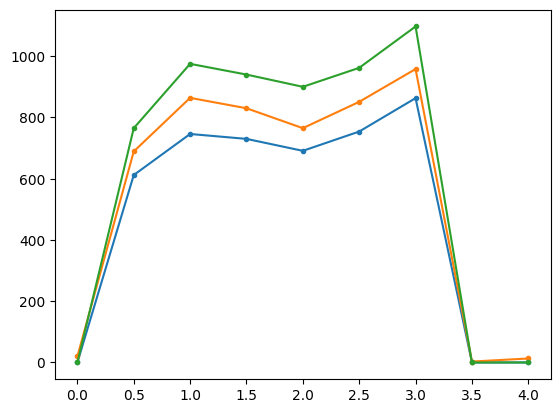

In [296]:
plt.plot(c20_N2['625.88'],'.-', label='626.2')
plt.plot(c20_N2['626.44'],'.-', label='626.2')
plt.plot(c20_N2['627.01'],'.-', label='626.2')
plt.show()

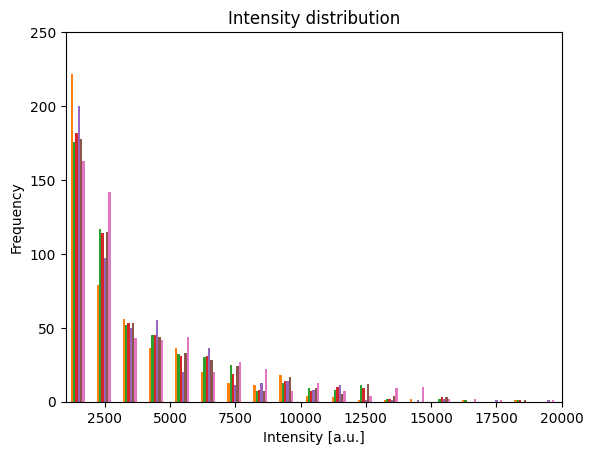

In [144]:
plt.hist(c20_N2.values.tolist(), bins=np.arange(0,60000,1000))
plt.xlim(1000,20000)
plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

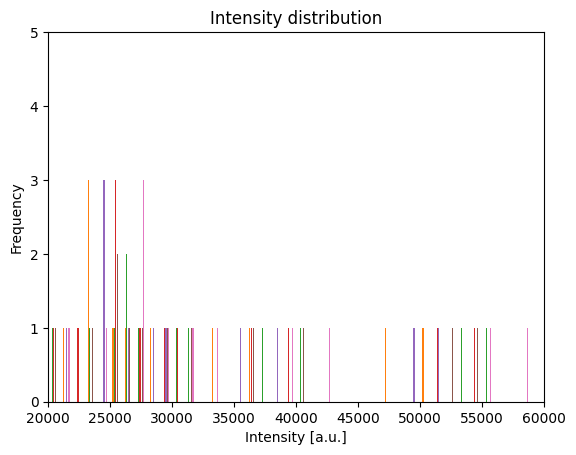

In [145]:
plt.hist(c20_N2.values.tolist(), bins=np.arange(0,60000,1000))
plt.xlim(20000,60000)
plt.ylim(0,5)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

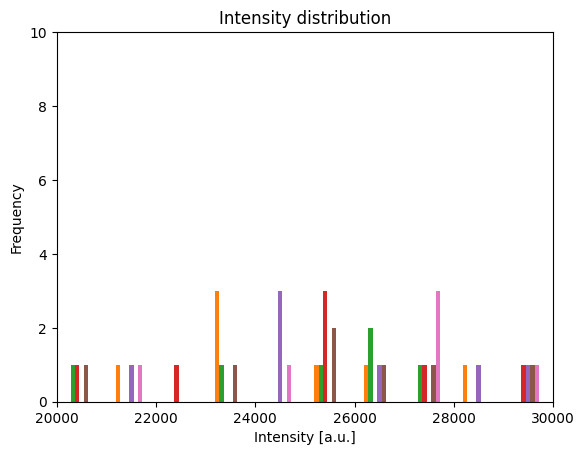

In [146]:
plt.hist(c20_N2.values.tolist(), bins=np.arange(0,60000,1000))
plt.xlim(20000,30000)
plt.ylim(0,10)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

In [153]:
max_int = []
for i in range(len(c20_N2.columns)):
    max_int.append(c20_N2.iloc[:,i].max())
pd.DataFrame(max_int, index=c20_N2.columns, columns=['max_intensity'])

,max_intensity
49.75,0.0
50.25,0.0
50.75,26.0
51.25,13.0
51.76,31.0
...,...
1189.41,58.0
1190.02,2.0
1190.63,0.0
1191.24,0.0


In [164]:
max_int = pd.DataFrame(max_int, index=c20_N2.columns, columns=['max_intensity'])
max_int = max_int.sort_values(by='max_intensity', ascending=False)
max_int[max_int['max_intensity']>1000].to_csv('file/process1/max_intensity.csv')

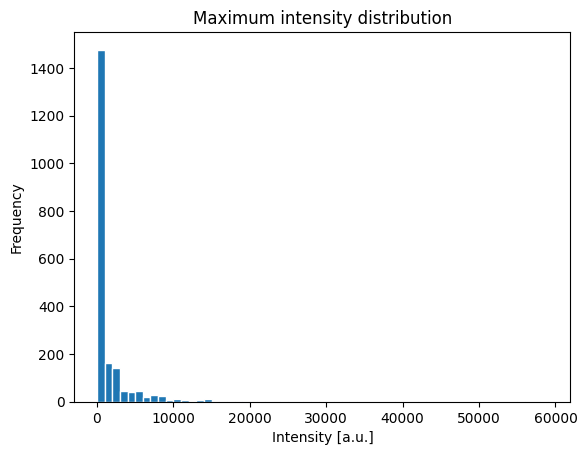

In [156]:
plt.hist(max_int,edgecolor='white',bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Maximum intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

In [172]:
# scaling and clustering
from sklearn.preprocessing import MinMaxScaler
c20_N2_scaled = c20_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c20_N2_scaled.index)):
    for j in range(len(c20_N2_scaled.columns)):
        if c20_N2_scaled.iloc[i,j]<1000:
            c20_N2_scaled.iloc[i,j]=0
for i in range(len(c20_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c20_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c20_N2_scaled.iloc[:,i] = mm.transform(np.array(c20_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

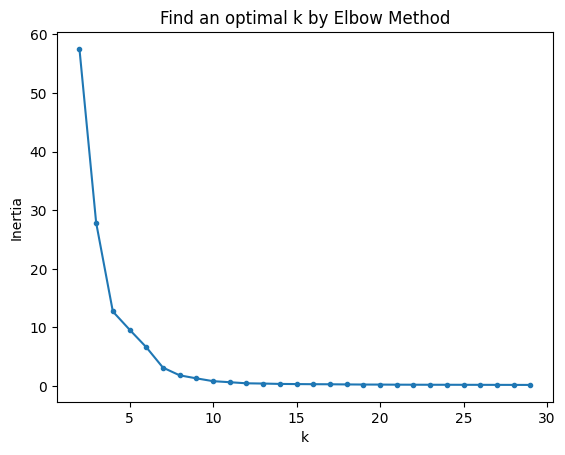

In [173]:
from sklearn.cluster import KMeans
# find the best k for K-Means alg
inertia = []
k=5
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c20_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

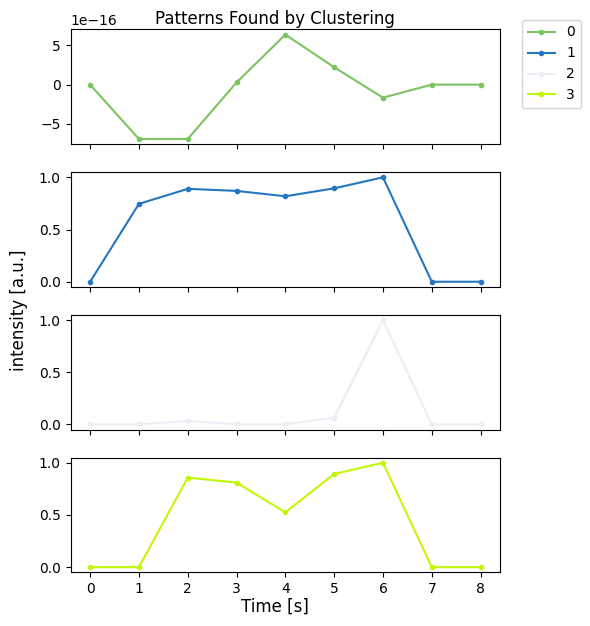

In [302]:
# set k
k = 4
km = KMeans(n_clusters=k, random_state=42)
km.fit(c20_N2_scaled.T)

# random color generator
import random
random.seed(8)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    # axs[idx].set_xlabel('time [s]')
    # axs[idx].set_xlim(3000,df.index[-1])
    # axs[idx].set_ylabel('intensity [a.u.]')
    # axs[idx].set_title(f'{cate_label[idx]} ({val}) | category {km.labels_}') # amu
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle('Patterns Found by Clustering', y=1)
fig.legend(set(km.labels_), bbox_to_anchor=(0.98, 0.995), loc='upper left')
plt.show()

In [192]:
[len(i) for i in wv_labled]

[1477, 515, 28, 28, 0]

In [232]:
wv_labled = []
for i in range(5):
    wv_labled.append(c20_N2_scaled.T[km.labels_==i].index.tolist())

pattern1 = pd.DataFrame([float(i) for i in wv_labled[1]]+[0]*10, columns=['pattern1'])
# pattern1.to_csv('file/process1/pattern1.csv')

patterns = pd.DataFrame([float(i) for i in wv_labled[2]], columns=['pattern2'])
patterns['pattern3'] = [float(i) for i in wv_labled[3]]
# patterns.to_csv('file/process1/patterns.csv')

In [233]:
pattern1 = pd.DataFrame(np.array(pattern1['pattern1']).reshape(35,-1).tolist()).T
pattern1.to_csv('file/process1/pattern1.csv')

In [242]:
pattern1.iloc[:,:18]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293.58,312.14,328.13,336.13,352.19,369.36,377.44,391.46,403.35,573.76,582.14,590.53,598.92,627.57,636.58,645.04,653.52,662.01
1,294.11,312.68,328.66,336.67,352.72,369.90,377.97,392.00,403.89,574.32,582.70,591.09,599.49,628.13,637.15,645.61,654.09,662.57
2,294.64,313.22,329.19,337.20,353.26,370.44,378.51,392.54,404.43,574.88,583.26,591.65,600.04,628.70,637.71,646.17,654.65,663.14
3,295.17,313.75,329.73,337.74,353.79,370.98,379.05,393.08,404.98,575.44,583.82,592.21,600.61,629.26,638.28,646.74,655.22,663.70
4,295.70,314.27,330.26,338.27,354.33,371.51,379.59,393.62,405.52,576.00,584.37,592.76,601.16,629.82,638.84,647.29,655.78,664.27
5,296.23,314.81,330.79,338.81,354.87,372.05,380.13,394.16,406.06,576.54,584.92,593.32,601.73,630.39,639.40,647.87,656.35,664.84
6,296.76,315.33,331.33,339.34,355.40,372.59,380.67,396.32,419.07,577.11,585.49,593.88,602.29,630.95,639.97,648.42,656.91,665.40
7,297.29,315.87,331.86,339.87,355.94,373.13,381.21,396.86,419.61,577.66,586.04,594.44,602.85,631.51,640.53,649.00,657.48,665.97
8,297.82,316.41,332.40,348.44,356.47,373.67,387.68,397.40,425.05,578.23,586.61,595.00,603.41,632.08,641.10,649.55,658.04,666.54
9,308.95,316.94,332.93,348.97,357.01,374.21,388.22,397.94,425.59,578.79,587.16,595.55,603.97,633.20,641.66,650.13,658.61,667.10


In [243]:
pattern1.iloc[:,18:]

,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,670.50,679.01,687.53,728.58,737.16,745.76,754.37,762.98,771.61,849.17,857.91,866.65,875.41,884.17,892.95,1039.54,1048.50
1,671.07,679.58,720.58,729.15,737.74,746.33,754.94,763.56,772.19,849.75,858.49,867.23,875.99,884.76,893.54,1040.14,1049.08
2,671.64,680.15,721.15,729.72,738.31,746.91,755.51,764.13,772.76,850.33,859.07,867.82,876.58,885.34,894.12,1040.73,1049.69
3,672.20,680.71,721.72,730.30,738.88,747.48,756.09,764.71,773.34,850.92,859.65,868.40,877.16,885.93,894.71,1041.33,1050.29
4,672.77,681.28,722.29,730.87,739.45,748.05,756.66,765.28,773.91,851.50,860.24,868.98,877.74,886.51,895.29,1041.93,1050.88
5,673.34,681.85,722.86,731.44,740.03,748.63,757.24,765.86,774.49,852.08,860.82,869.57,878.33,887.10,1033.58,1042.52,0.00
6,673.90,682.42,723.43,732.01,740.60,749.20,757.81,766.43,775.07,852.66,861.40,870.15,878.91,887.68,1034.17,1043.11,0.00
7,674.47,682.98,724.01,732.58,741.17,749.77,758.39,767.01,775.64,853.25,861.99,870.74,879.50,888.27,1034.77,1043.72,0.00
8,675.04,683.55,724.58,733.16,741.75,750.35,758.96,767.58,776.22,853.83,862.57,871.32,880.08,888.85,1035.36,1044.32,0.00
9,675.61,684.12,725.15,733.73,742.32,750.92,759.53,768.16,776.79,854.41,863.15,871.90,880.67,889.44,1035.96,1044.91,0.00


In [244]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c20_N2.columns.tolist()]
y = c20_N2.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '6ba4d498-55ae-4cde-a4c7-3867e26ab6b2',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 5., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 intensity'},
               'xaxis': {'gridcolor': 'lightgrey',
                         'linecolor': 'ligh

In [273]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='wavelength[nm]')
df_clicked.to_csv('file/process1/N2_peaks.csv', index=False)

In [274]:
pattern1 = pd.DataFrame([float(i) for i in wv_labled[1]])
p1 = np.array(pattern1.values.tolist()).flatten().tolist()
print(len(p1))
for i in p1:
    if i in x:
        p1.remove(i)
print(len(p1))     

515
460


In [276]:
pattern1_removed = pd.DataFrame(np.array(p1).reshape(46,10).tolist()).T
pattern1_removed.to_csv('file/process1/pattern1_removed.csv')

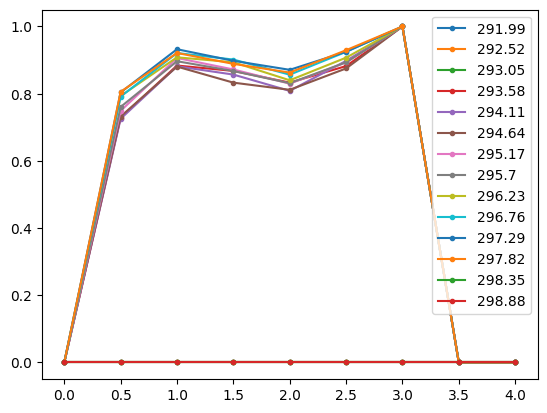

In [283]:
test = [291.99, 292.52, 293.05, 293.58, 294.11, 294.64, 295.17, 295.7, 296.23, 296.76, 297.29, 297.82, 298.35, 298.88]
test = [str(i) for i in test]
for i in test:
    plt.plot(c20_N2_scaled[i],'.-')
plt.legend(test)
plt.show()

In [292]:
max_int.loc[wv_labled[2]]

,max_intensity
324.93,1089.0
365.6,1002.0
367.75,1038.0
387.14,1046.0
433.2,1014.0
433.75,1076.0
607.9,1060.0
612.39,1041.0
622.51,1015.0
623.63,1030.0


In [297]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c20_N2.columns.tolist()]
y = c20_N2.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '714fa011-9f23-417d-b4d4-15dc14e29105',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 5., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 intensity'},
               'xaxis': {'gridcolor': 'lightgrey',
                         'linecolor': 'ligh

In [294]:
max_int.loc[wv_labled[3]]

,max_intensity
347.9,1190.0
366.14,1242.0
367.21,1220.0
368.29,1164.0
394.7,1186.0
418.53,1139.0
424.5,1107.0
572.09,1222.0
607.34,1168.0
608.46,1206.0


In [299]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c20_N2.columns.tolist()]
y = c20_N2.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity; pattern 3')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
mycolor = colors[3]
scatter.line.color = mycolor
scatter.marker.color = [mycolor] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [mycolor] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#C2F708'},
              'marker': {'color': [#C2F708, #C2F708, #C2F708, ..., #C2F708,
                                   #C2F708, #C2F708],
                         'line': {'color': [#C2F708, #C2F708, #C2F708, ...,
                                            #C2F708, #C2F708, #C2F708],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'b2900ad7-4f0f-4ff0-9380-a6c72297468a',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 5., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 intensity; pattern 3'},
               'xaxis': {'gridcolor': 'lightgrey',
                         'lineco

In [ ]:
c20_log_N2 = c20_log[(c20_log.index>=c20_start+6)&(c20_log.index<=c20_start+11)]
c20_log_NH3 = c20_log[(c20_log.index>=c20_start+22)&(c20_log.index<=c20_start+40)]

c40_log_N2 = c40_log[(c40_log.index>=c40_start+19)&(c40_log.index<=c40_start+24)]
c40_log_NH3 = c40_log[(c40_log.index>=c40_start+36)&(c40_log.index<=c40_start+54)]

c60_log_N2 = c60_log[(c60_log.index>=c60_start+32)&(c60_log.index<=c60_start+37)]
c60_log_NH3 = c60_log[(c60_log.index>=c60_start+49)&(c60_log.index<=c60_start+66)]

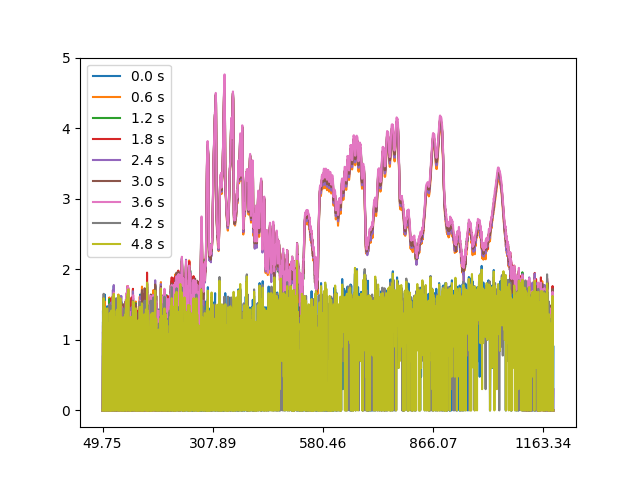

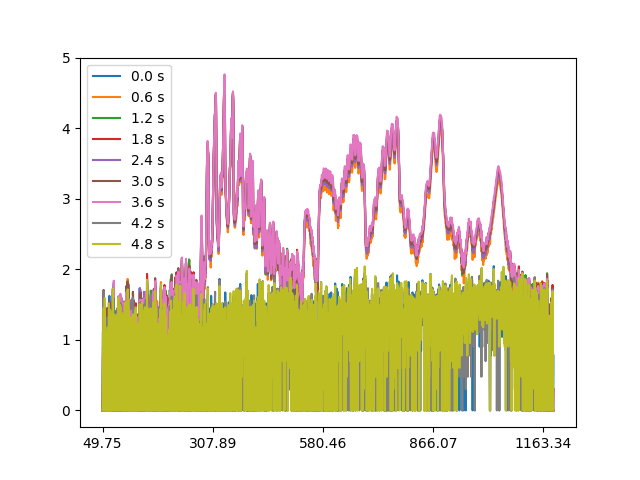

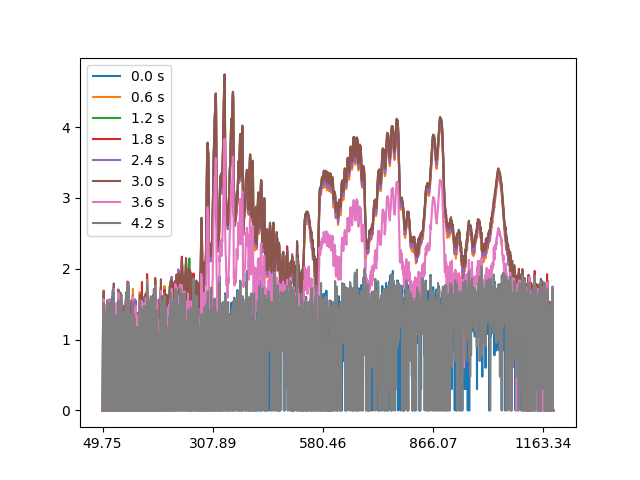

In [60]:
c20_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_N2))]
c20_log_N2.T.plot(kind='line')
plt.show()

c40_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_N2))]
c40_log_N2.T.plot(kind='line')
plt.show()

c60_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_N2))]
c60_log_N2.T.plot(kind='line')
plt.show()

In [21]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_log_N2['336.67'].idxmax(), c40_log_N2['336.67'].idxmax(), c60_log_N2['336.67'].idxmax())

0.6 s 1.2 s 0.0 s


In [22]:
# get the plot at 1.2s
c_N2_absolute = pd.concat([c20_N2[c20_N2.index=='0.6 s'], c40_N2[c40_N2.index=='3.0 s'], c60_N2[c60_N2.index=='0.6 s']])
c_N2_absolute.index = [20,40,60] # refers to cycles
c_N2_log = pd.concat([c20_log_N2[c20_log_N2.index=='0.6 s'], c40_log_N2[c40_log_N2.index=='3.0 s'], c60_log_N2[c60_log_N2.index=='0.6 s']])
c_N2_log.index = [20,40,60] # refers to cycles

In [23]:
c_N2_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
20,0.0,0.0,5.0,10.0,6.0,38.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,3.0,52.0,0.0,0.0,0.0,0.0
40,0.0,0.0,18.0,0.0,10.0,50.0,0.0,0.0,0.0,0.0,...,0.0,11.0,0.0,7.0,8.0,47.0,0.0,0.0,0.0,0.0
60,0.0,0.0,13.0,0.0,7.0,41.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,10.0,35.0,0.0,0.0,0.0,0.0


In [ ]:
c_N2_absolute.to_csv('file/process1/cycles_c_N2_absolute.csv')
c_N2_log.to_csv('file/process1/cycles_c_N2_log.csv')

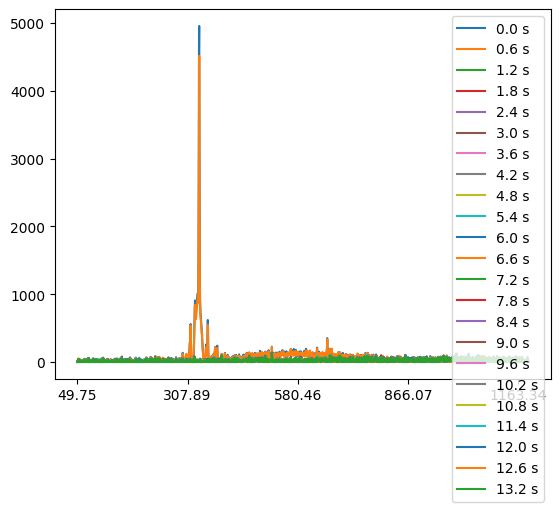

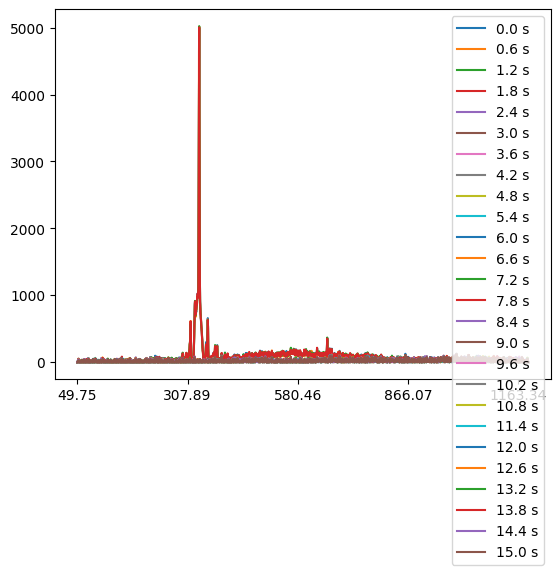

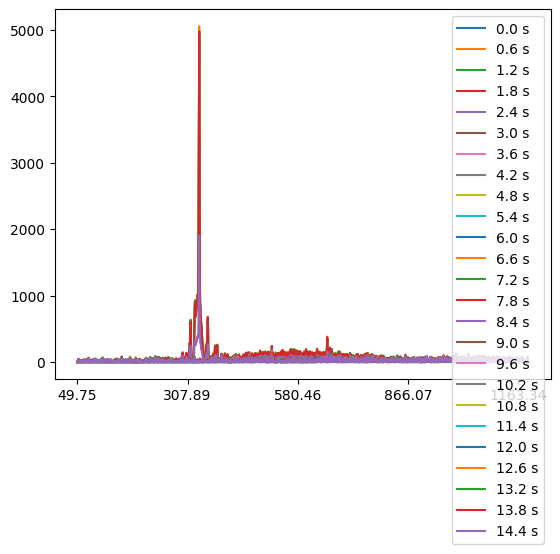

In [24]:
c20_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_NH3))]
c20_NH3.T.plot(kind='line')
plt.show()

c40_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_NH3))]
c40_NH3.T.plot(kind='line')
plt.show()

c60_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_NH3))]
c60_NH3.T.plot(kind='line')
plt.show()

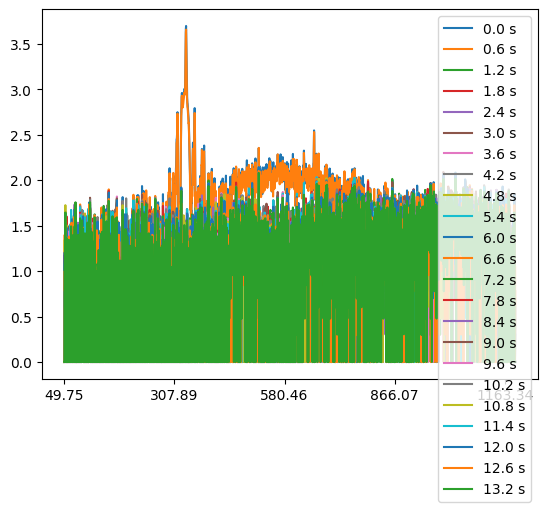

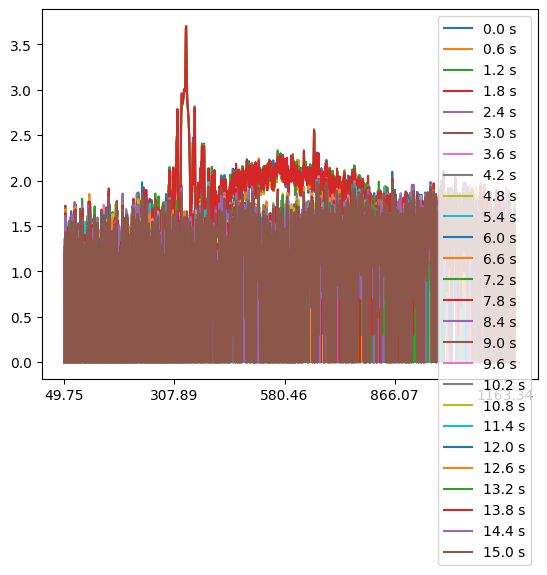

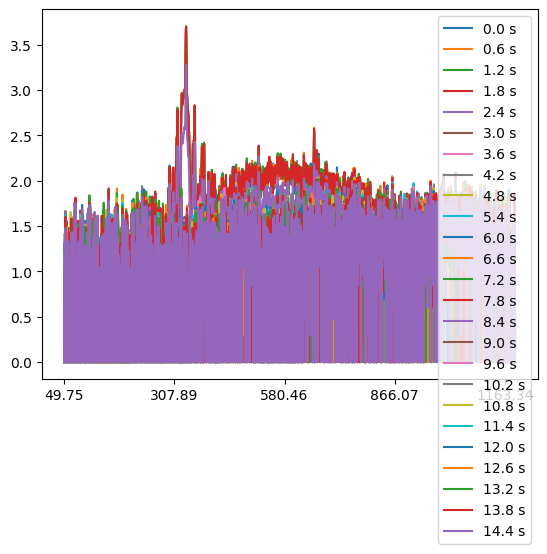

In [25]:
c20_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_NH3))]
c20_log_NH3.T.plot(kind='line')
plt.show()

c40_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_NH3))]
c40_log_NH3.T.plot(kind='line')
plt.show()

c60_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_NH3))]
c60_log_NH3.T.plot(kind='line')
plt.show()

In [26]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_NH3['336.13'].idxmax(), c40_NH3['336.13'].idxmax(), c60_NH3['336.13'].idxmax())

0.0 s 1.2 s 0.6 s


In [27]:
# save NH3 at 6.6s
c_NH3_absolute = pd.concat([c20_NH3[c20_NH3.index=='8.4 s'], c40_NH3[c40_NH3.index=='12.6 s'], c60_NH3[c60_NH3.index=='13.2 s']])
c_NH3_log = pd.concat([c20_log_NH3[c20_log_NH3.index=='8.4 s'], c40_log_NH3[c40_log_NH3.index=='12.6 s'], c60_log_NH3[c60_log_NH3.index=='13.2 s']])

c_NH3_absolute.index = [20,40,60] # refers the 20th cycle
c_NH3_log.index = [20,40,60]
c_NH3_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
20,0.0,0.0,9.0,4.0,9.0,41.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0
40,0.0,0.0,1.0,8.0,12.0,47.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,8.0,22.0,32.0,4.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,4.0,47.0,0.0,0.0,0.0,0.0


In [ ]:
c_NH3_absolute.to_csv('file/process1/cycles_c_NH3_absolute.csv')
c_NH3_log.to_csv('file/process1/cycles_c_NH3_log.csv')

In [29]:
# random color generator
import random
random.seed(42)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(6)]

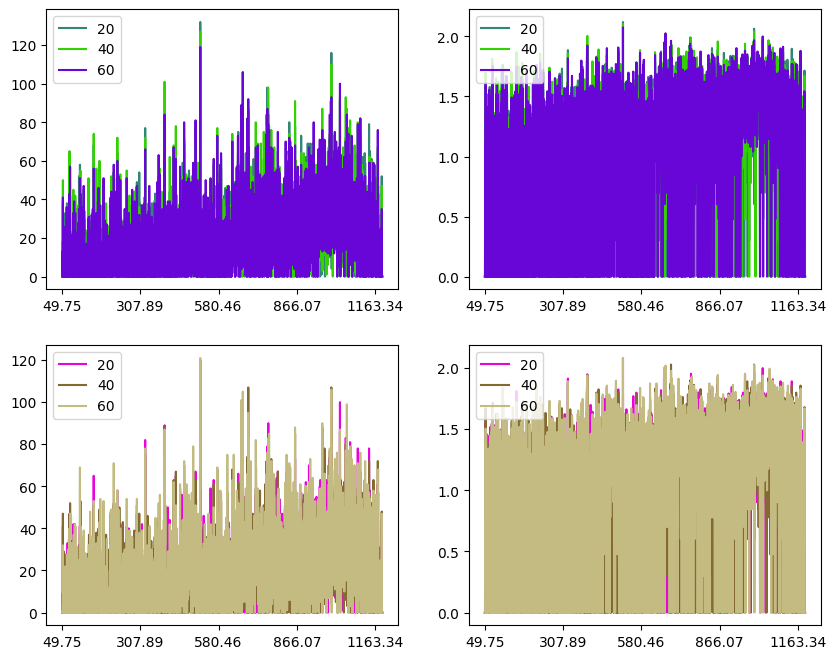

In [30]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
c_N2_absolute.T.plot(kind='line', ax=axs[0,0],color=colors[:3])
c_N2_log.T.plot(kind='line', ax=axs[0,1], color=colors[:3])
c_NH3_absolute.T.plot(kind='line',ax=axs[1,0], color=colors[3:])
c_NH3_log.T.plot(kind='line',ax=axs[1,1], color=colors[3:])
plt.show()

In [31]:
# wavelength scaling
mm = MinMaxScaler()
mm.fit(np.array(c_N2_absolute.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(c_N2_absolute.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
for i in range(3):
    axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
    axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity per cycle')
    axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
    axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity per cycle')
    axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity per cycle')
    axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity per cycle')
plt.show()

In [ ]:
fig.savefig('file/process1/process1_dynamics.png')

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
i = 1 # save the 40th cycle
axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
fig.suptitle('Process #1 : N2-NH3')
plt.show()

No significant differences in a change of intensity with cycles observed.

In [ ]:
fig.savefig('file/process1/process1_cycle40.png',bbox_inches=False)

In [ ]:
# to save each plot

i = 1 # save the 40th cycle
fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process1/process1_N2_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process1/process1_N2_log')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process1/process1_NH3_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process1/process1_NH3_log')

# fig, axis = plt.plot(c_N2_log.values.tolist()[i],'.-',color=colors[i])
# # axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
# plt.show()

In [20]:
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c_N2_absolute.columns.tolist()]
y = c_N2_absolute.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

NameError: name 'c_N2_absolute' is not defined

In [428]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks.csv', index=False)

In [430]:
# make them interactive
x = [float(i) for i in c_N2_log.columns.tolist()]
y = c_N2_log.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '3dd9d408-3726-4c24-8f33-7005bb3b3794',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 2.30258509, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 log intensity during the 40th cyc

In [432]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_N2_log.csv', index=False)

In [19]:
# make them interactive
x = [float(i) for i in c_NH3_absolute.columns.tolist()]
y = c_NH3_absolute.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,6000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; NH3 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[4]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

NameError: name 'c_NH3_absolute' is not defined

In [435]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_NH3_absolute.csv', index=False)

In [436]:
# make them interactive
x = [float(i) for i in c_NH3_log.columns.tolist()]
y = c_NH3_log.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; NH3 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[4]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#846A32'},
              'marker': {'color': [#846A32, #846A32, #846A32, ..., #846A32,
                                   #846A32, #846A32],
                         'line': {'color': [#846A32, #846A32, #846A32, ...,
                                            #846A32, #846A32, #846A32],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '8056b76f-0eb6-4d05-800a-7671a17c541c',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 0., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; NH3 log intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
                

In [437]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_NH3_log.csv', index=False)